<a href="https://colab.research.google.com/github/Specialgirl20/DATA-ANALYSIS-PROJECT/blob/main/DENNIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dennis online sales data.csv to Dennis online sales data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
Data = pd.read_csv('Dennis online sales data.csv')

In [ ]:
Data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,1/1/2024,Electronics,iPhone 14 Pro,2,"$1,000",2000,North America,Credit Card
1,10002,1/2/2024,Home Appliances,Dyson V11 Vacuum,1,$500,500,Europe,PayPal
2,10003,1/3/2024,Clothing,Levi's 501 Jeans,3,$70,210,Asia,Debit Card
3,10004,1/4/2024,Books,The Da Vinci Code,4,$16,64,North America,Credit Card
4,10005,1/5/2024,Beauty Products,Neutrogena Skincare Set,1,$90,90,Europe,PayPal


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    240 non-null    int64 
 1   Date              240 non-null    object
 2   Product Category  240 non-null    object
 3   Product Name      240 non-null    object
 4   Units Sold        240 non-null    int64 
 5   Unit Price        240 non-null    object
 6   Total Revenue     240 non-null    int64 
 7   Region            240 non-null    object
 8   Payment Method    240 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.0+ KB


In [ ]:
Data.describe()

,Transaction ID,Units Sold,Total Revenue
count,240.00000,240.000000,240.000000
mean,10120.50000,2.158333,335.733333
std,69.42622,1.322454,485.795637
min,10001.00000,1.000000,7.000000
25%,10060.75000,1.000000,63.000000
50%,10120.50000,2.000000,180.000000
75%,10180.25000,3.000000,399.250000
max,10240.00000,10.000000,3900.000000


In [ ]:
Data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [ ]:
Data.duplicated().sum()

0

**EXPLORATORY DATA ANALYSIS(EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# checking the value counts
for col in Data.columns[2:]:
    if Data[col].dtype == 'O' and col != 'Product Name':
        print(f"\nValue count of {Data[col].value_counts()}\n")



Value count of Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64


Value count of Unit Price
$30       10
$50        9
$200       9
$300       9
$15        8
          ..
$82        1
$110       1
$3,900     1
$1,500     1
$299       1
Name: count, Length: 92, dtype: int64


Value count of Region
North America    80
Europe           80
Asia             80
Name: count, dtype: int64


Value count of Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64



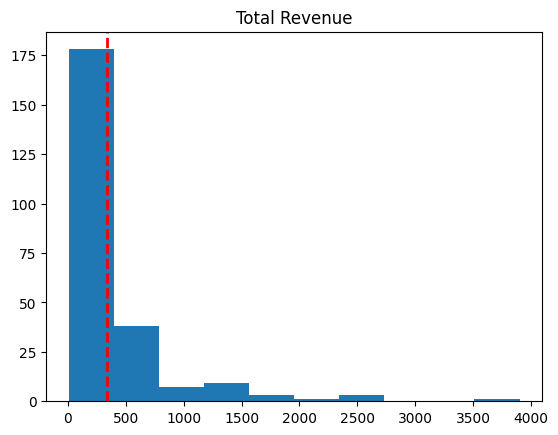

In [ ]:
'''this code block provides a visual summary of the Total Revenue distribution in the DataFrame df,
highlighting the mean Total value with a dashed red line.'''

plt.hist(Data['Total Revenue'])

#Plotting a line for the mean value in Total Revenue
plt.axvline(Data['Total Revenue'].mean(), color='red', linestyle='dashed', linewidth=2, label='Revenue')

plt.title('Total Revenue')
plt.show()

In [ ]:
# checking which Payment method is most used in terms of Total Revenue
revenue_by_payment = Data.groupby('Payment Method')['Total Revenue'].sum()
print(revenue_by_payment)

Payment Method
Credit Card    51174
Debit Card      8131
PayPal         21271
Name: Total Revenue, dtype: int64


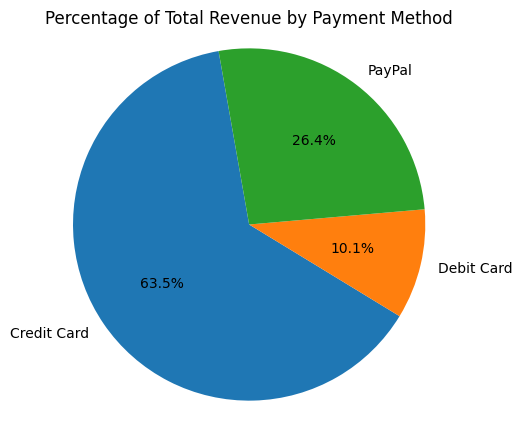

In [ ]:
# Percentage of Total Revenue by Payment Method
plt.figure(figsize = (5,5))
plt.pie(revenue_by_payment,labels = revenue_by_payment.index,autopct='%1.1f%%',startangle = 100)
plt.title('Percentage of Total Revenue by Payment Method')
plt.axis('equal')
plt.show()

**INSIGHTS FROM THE CHAT ABOVE**

Credit Card: Generated the highest total revenue of 51,170.86 or 63.5%.
Debit Card: Generated a total revenue of 8,128.93 or 10.1%.
PayPal: Generated a total revenue of 21,268.06 or 26.4%.
Credit Card transactions significantly contributed the most to total revenue compared to Debit Card and PayPal transactions.

In [ ]:
# checking which region has highest number of customer according to product category
customer_counts = Data.groupby(['Region','Product Category'])['Transaction ID'].nunique().reset_index()
customer_counts

,Region,Product Category,Transaction ID
0,Asia,Clothing,40
1,Asia,Sports,40
2,Europe,Beauty Products,40
3,Europe,Home Appliances,40
4,North America,Books,40
5,North America,Electronics,40


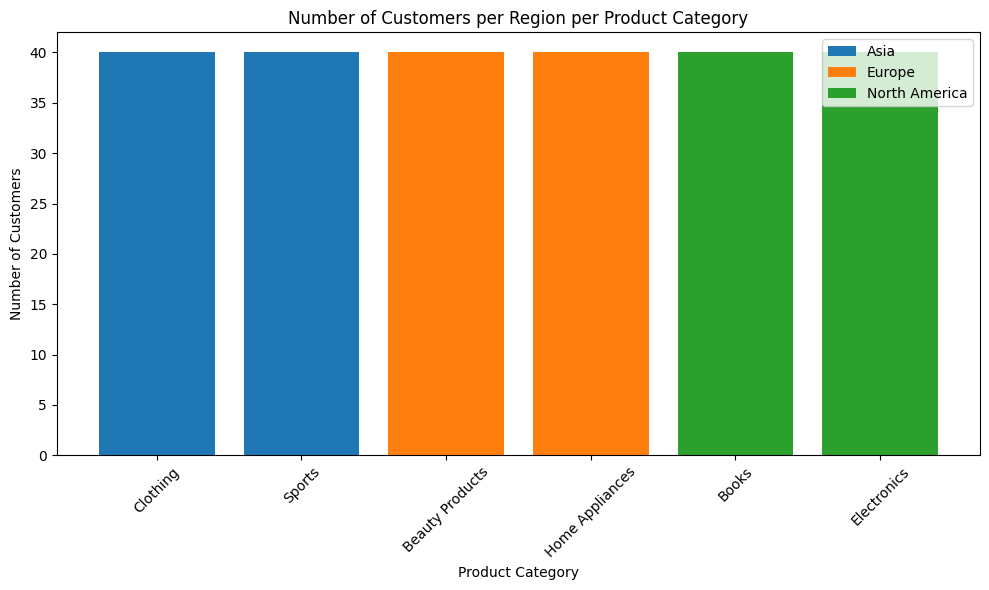

In [ ]:
plt.figure(figsize=(10, 6))
for region in customer_counts['Region'].unique():
    region_data = customer_counts[customer_counts['Region'] == region]
    plt.bar(region_data['Product Category'], region_data['Transaction ID'], label=region)

plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Region per Product Category')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INSIGHTS DERIVED FROM THE CHAT ABOVE

In Asia, people exclusively purchase clothing and sports products.
In Europe, people exclusively purchase beauty and home appliances products.
In North America, people exclusively purchase books and electronics products.

In [ ]:
# checking relation between feature
correlation = Data.corr(numeric_only = True)
correlation

,Transaction ID,Units Sold,Total Revenue
Transaction ID,1.000000,-0.189944,-0.175612
Units Sold,-0.189944,1.000000,-0.171130
Total Revenue,-0.175612,-0.171130,1.000000


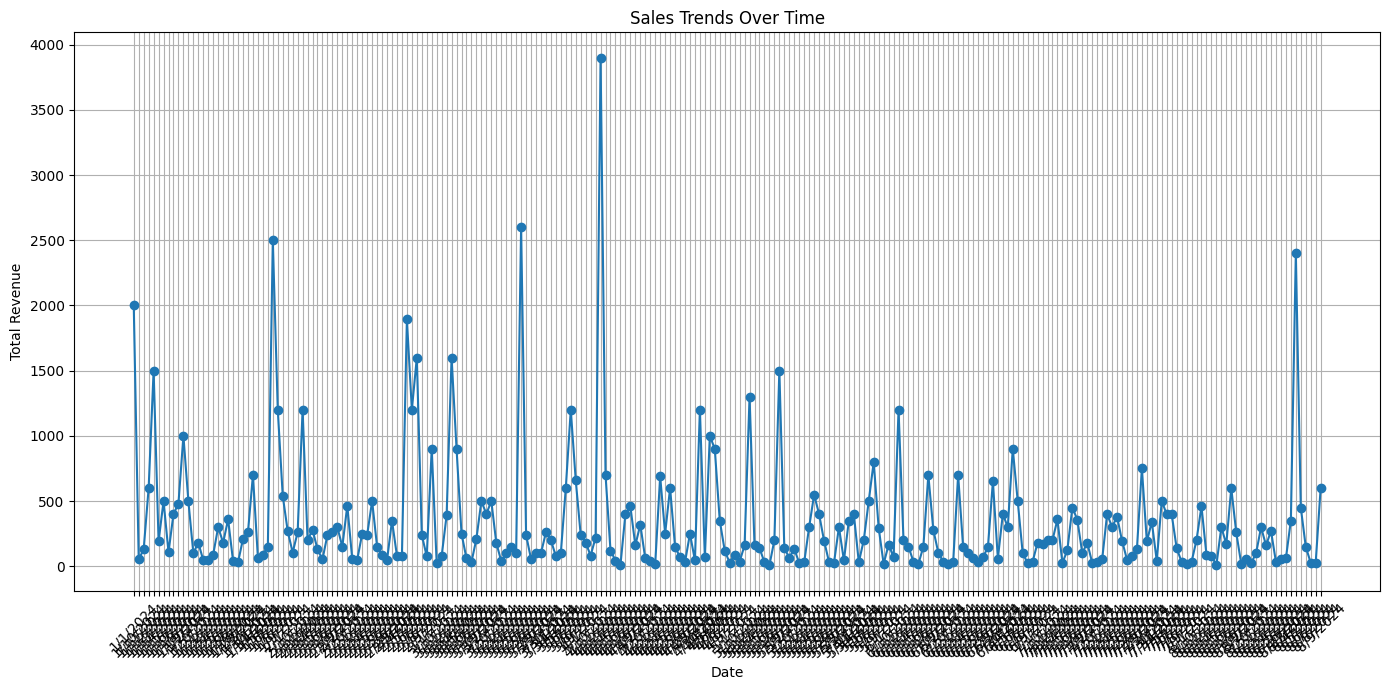

In [ ]:
# Group by Date and sum the Total Revenue
sales_trends = Data.groupby('Date')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(sales_trends['Date'], sales_trends['Total Revenue'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

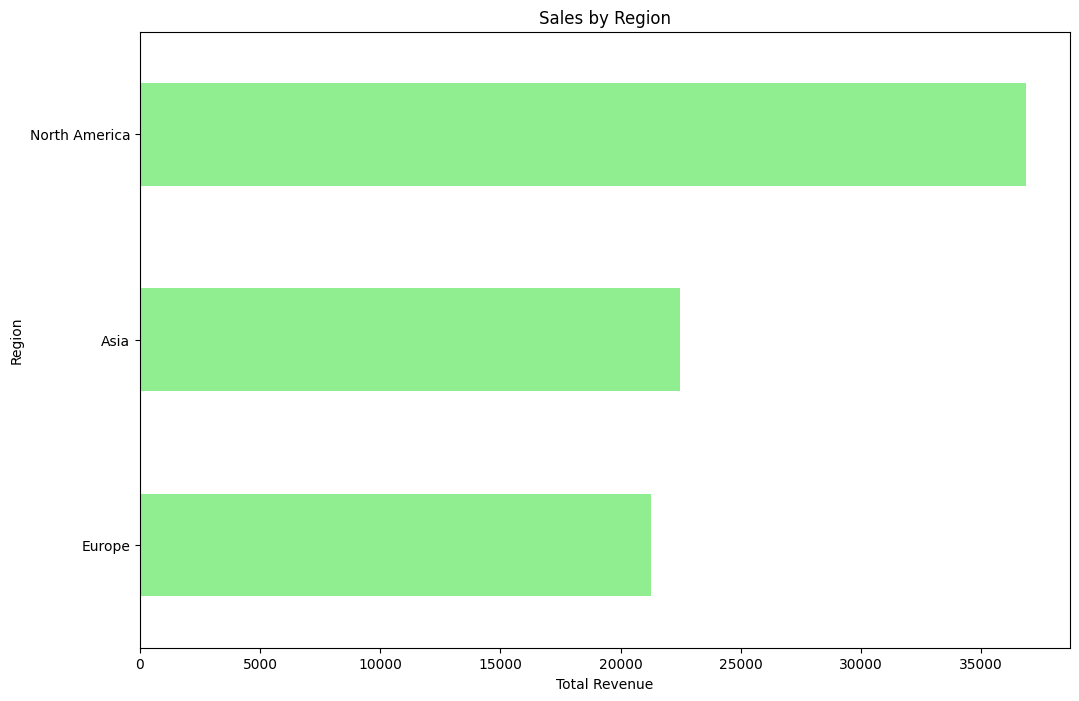

In [ ]:
# Group by Region and sum the Total Revenue
region_sales = Data.groupby('Region')['Total Revenue'].sum().sort_values()

plt.figure(figsize=(12, 8))
region_sales.plot(kind='barh', color='lightgreen')
plt.title('Sales by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()

In [ ]:
#This line selects columns from the DataFrame df that have data types 'object' (typically string data) or 'category' (categorical data).
cat_features = Data.select_dtypes(include=['object','category'])

In [ ]:
cat_features

,Date,Product Category,Product Name,Unit Price,Region,Payment Method
0,1/1/2024,Electronics,iPhone 14 Pro,"$1,000",North America,Credit Card
1,1/2/2024,Home Appliances,Dyson V11 Vacuum,$500,Europe,PayPal
2,1/3/2024,Clothing,Levi's 501 Jeans,$70,Asia,Debit Card
3,1/4/2024,Books,The Da Vinci Code,$16,North America,Credit Card
4,1/5/2024,Beauty Products,Neutrogena Skincare Set,$90,Europe,PayPal
...,...,...,...,...,...,...
235,8/23/2024,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,$160,Europe,PayPal
236,8/24/2024,Clothing,Nike Air Force 1 Sneakers,$90,Asia,Debit Card
237,8/25/2024,Books,The Handmaid's Tale by Margaret Atwood,$11,North America,Credit Card
238,8/26/2024,Beauty Products,Sunday Riley Luna Sleeping Night Oil,$55,Europe,PayPal


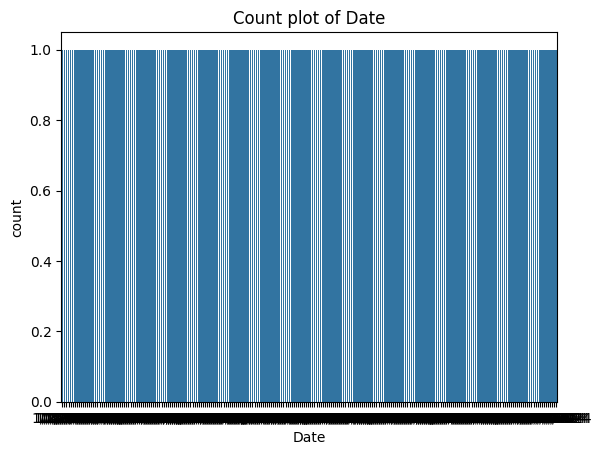

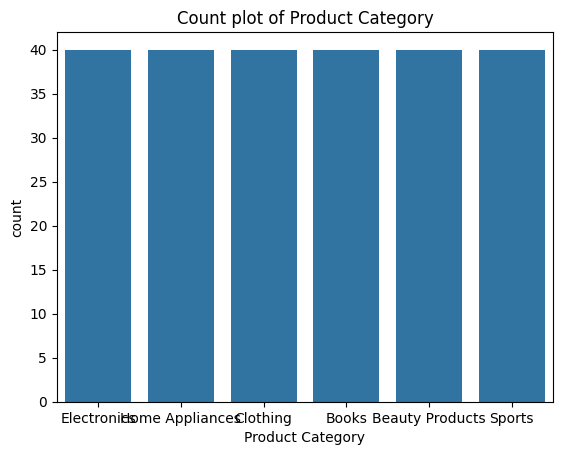

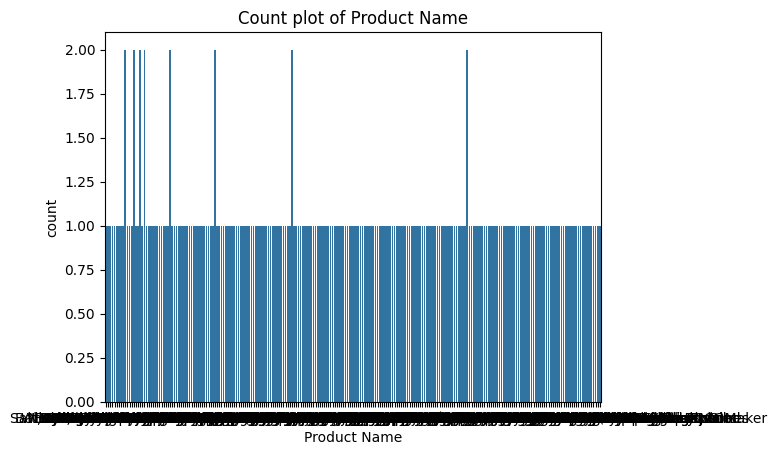

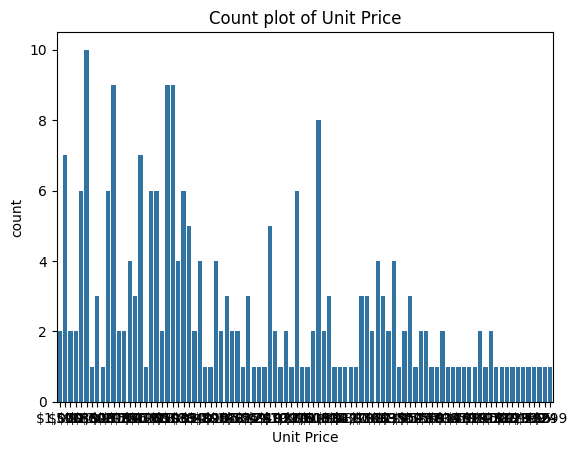

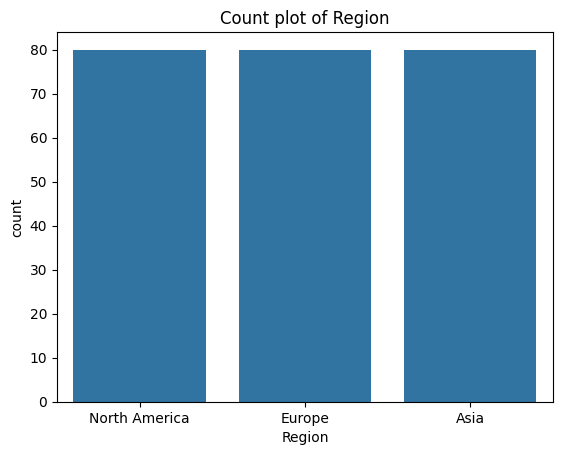

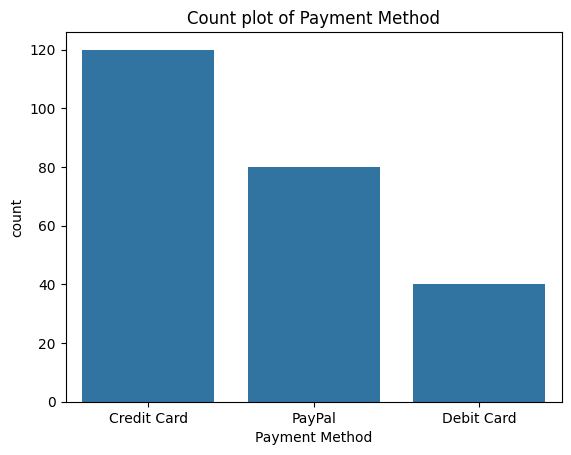

In [ ]:
'''This line iterates over each column (feature) in cat_features.
and  creates a count plot for the current categorical feature (col) using Seaborn's countplot() function.

'''
for col in cat_features:
    sb.countplot(x=col, data=Data) #sb.countplot(x='gender', data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

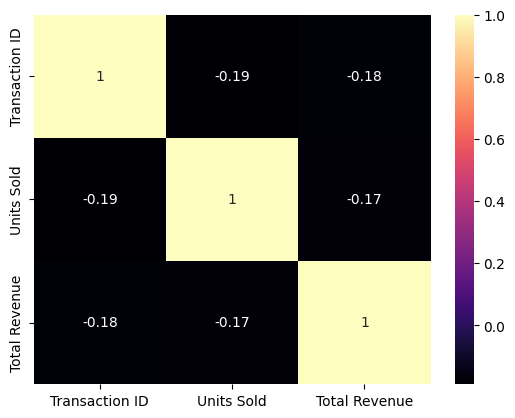

In [ ]:
sb.heatmap(data = correlation,annot = True,cmap = 'magma')
plt.show()

**INSIGHT ON THE HEATMAP**

Based on the chat there is only strong positive correlation between Unit Price and Total Revenue.
And other feature showing the negative correlation between each other.

**DATA TRANSFORMATION**

In [ ]:
Data['Product Name'].value_counts()

Product Name
Dyson Supersonic Hair Dryer                         2
The Girl with the Dragon Tattoo by Stieg Larsson    2
Keurig K-Elite Coffee Maker                         2
The Silent Patient by Alex Michaelides              2
Dune by Frank Herbert                               2
                                                   ..
LG OLED TV                                          1
Uniqlo Ultra Light Down Jacket                      1
Sunday Riley Good Genes                             1
On Running Cloud Shoes                              1
Yeti Rambler 20 oz Tumbler                          1
Name: count, Length: 232, dtype: int64

In [ ]:
'''This line imports the LabelEncoder class from the sklearn.preprocessing module.
LabelEncoder is used to convert categorical labels into numerical values.

'''
from sklearn.preprocessing import LabelEncoder

In [ ]:
'''This line initializes an instance of the LabelEncoder class,
which will be used to transform categorical labels into numerical values.

'''

le = LabelEncoder()

In [ ]:
cat_features

,Date,Product Category,Product Name,Unit Price,Region,Payment Method
0,1/1/2024,Electronics,iPhone 14 Pro,"$1,000",North America,Credit Card
1,1/2/2024,Home Appliances,Dyson V11 Vacuum,$500,Europe,PayPal
2,1/3/2024,Clothing,Levi's 501 Jeans,$70,Asia,Debit Card
3,1/4/2024,Books,The Da Vinci Code,$16,North America,Credit Card
4,1/5/2024,Beauty Products,Neutrogena Skincare Set,$90,Europe,PayPal
...,...,...,...,...,...,...
235,8/23/2024,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,$160,Europe,PayPal
236,8/24/2024,Clothing,Nike Air Force 1 Sneakers,$90,Asia,Debit Card
237,8/25/2024,Books,The Handmaid's Tale by Margaret Atwood,$11,North America,Credit Card
238,8/26/2024,Beauty Products,Sunday Riley Luna Sleeping Night Oil,$55,Europe,PayPal


In the code below The first line starts a loop that iterates over each column in the DataFrame cat_features which contains only categorical columns.
Inside the loop, it applies label encoding to each categorical column.
The fit_transform() method of the LabelEncoder class fits the encoder to the unique values of the column and then transforms the labels into numerical values.
The transformed numerical values are assigned back to the corresponding column in the DataFrame df, replacing the original categorical values with numerical representations.

In [ ]:
for column in cat_features.columns:
    Data[column] = le.fit_transform(Data[column])   #Data['Product Category'] = le.fit_transform(Data['Product Category'])

In [ ]:
Data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,0,3,230,2,0,2000,2,0
1,10002,11,4,59,1,67,500,1,2
2,10003,22,2,115,3,79,210,0,1
3,10004,25,1,182,4,24,64,2,0
4,10005,26,0,131,1,89,90,1,2


**FEATURE SELECTION**

In [ ]:
X = Data[['Unit Price']] #Feature
y = Data['Total Revenue']    #Label/target

In [ ]:
'''This block of code splits your dataset into training and testing sets using train_test_split() from scikit-learn.
X is the feature data, and y is the target variable.
test_size=0.3 specifies that 30% of the data will be used for testing, and 70% will be used for training.
random_state=0 ensures reproducibility by fixing the random seed.

'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#This line imports the LinearRegression class from scikit-learn.
from sklearn.linear_model import LinearRegression

#This line creates an instance of the LinearRegression model and fits it to the training data (X_train and y_train) using the fit() method.
#The model learns the coefficients (weights) for the linear regression equation that best fits the training data.

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [ ]:
#This line retrieves the coefficients (slopes) of the linear regression model.

model.coef_

array([-2.58098407])

In [ ]:
#This line retrieves the intercept of the linear regression model.

model.intercept_

468.91518039043376

Regression formular X = -2.58098407 + 468.91518039043376

Y= B0 + B1 X.

In the regression formula, X represents the predicted Product Category, y represents the years of Total Revenue,
This formula can be used to predict Total Revenue based on Product Category using the trained linear regression model.

In [ ]:
#evaluating the performance of your linear regression model using various regression metrics
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 137552.55119774144
RMSE: 370.88077760614857
R2: -0.24511587930024858


# **MULTILINEAR REGRESSION**

In [ ]:
X = Data[['Units Sold','Unit Price','Total Revenue']]
y = Data['Product Category']

#here, we are selecting three columns as the features: 'Product Category', 'Unit Price', and 'Region'.

In [ ]:
X

,Units Sold,Unit Price,Total Revenue
0,2,0,2000
1,1,67,500
2,3,79,210
3,4,24,64
4,1,89,90
...,...,...,...
235,1,25,160
236,3,89,270
237,3,10,33
238,1,70,55


In [ ]:
y

0      3
1      4
2      2
3      1
4      0
      ..
235    4
236    2
237    1
238    0
239    5
Name: Product Category, Length: 240, dtype: int64

In [ ]:
## Split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [ ]:
model.intercept_

1.73312070084044

In [ ]:
model.coef_

array([0.04797971, 0.00551135, 0.00113603])

In [ ]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", round(r2,2))

MSE: 2.820934907944159
RMSE: 1.679563904096584
R2: 0.08


In [ ]:
r2_score(y_train, model.predict(X_train))

0.1262059525072704

# **DECISION TREE**

**The code snippet below import the DecisionTreeRegressor class, which is used to create a decision tree model for regression tasks, and the export_text function, which is used to visualize the decision tree in text format**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
dt_model = DecisionTreeRegressor().fit(X, y)
print (dt_model, "\n")

# Visualize the model tree
tree = export_text(dt_model)
print(tree)

DecisionTreeRegressor() 

|--- feature_2 <= 137.50
|   |--- feature_2 <= 87.00
|   |   |--- feature_0 <= 1.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_2 <= 59.00
|   |   |   |   |--- feature_2 <= 57.00
|   |   |   |   |   |--- feature_1 <= 19.50
|   |   |   |   |   |   |--- feature_2 <= 39.50
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_2 >  39.50
|   |   |   |   |   |   |   |--- feature_2 <= 42.00
|   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |   |--- feature_2 >  42.00
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_1 >  19.50
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- feature_1 <= 25.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 22.50
|   |   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |   |--- feature_1 >  22.50
|   |   |   |   |   |   |   |   |   |--- value: [

In [ ]:
# Evaluate the model using the test data
predictions = dt_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.5788966049382717
RMSE: 0.7608525513779076
R2: 0.8121439749608763


In [ ]:
r2_score_training = r2_score(y_train,model.predict(X_train))
r2_score_training

0.1262059525072704

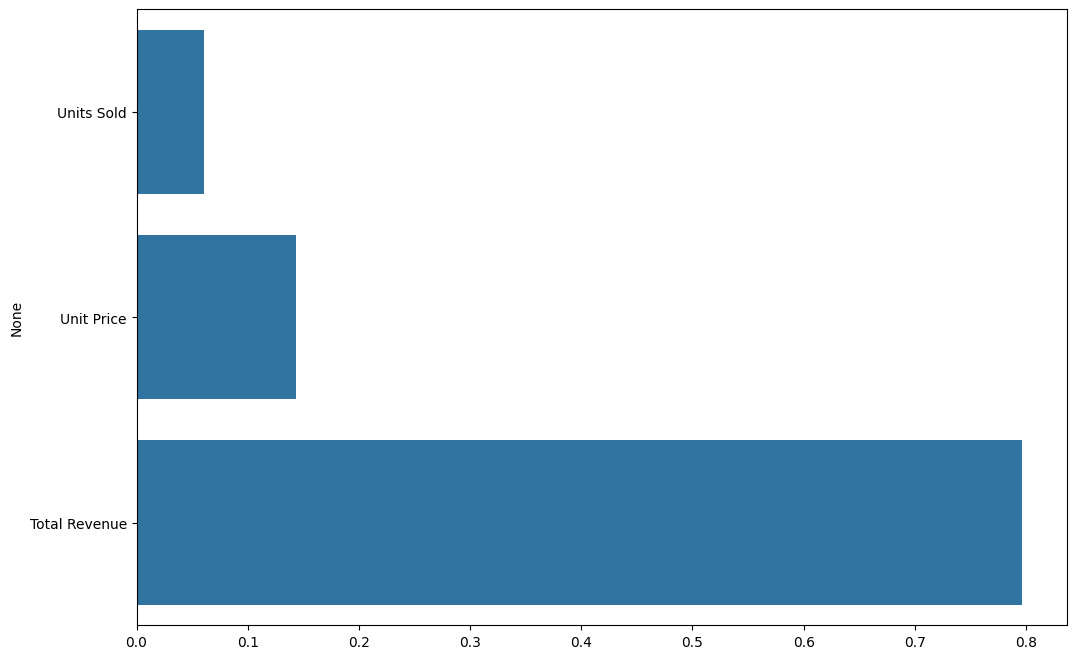

In [ ]:
#feature importance

plt.figure(figsize=(12,8))

importance = dt_model.feature_importances_

sb.barplot(x=importance, y=X.columns)
plt.show()

The Feature importances represent the relative importance of each feature in predicting the target variable. Higher importance values indicate features that are more influential in making predictions. and based n this data the TOTAL REVENUE has the highest determinant,followed be the unit price and Unit Sold

In [ ]:
Data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,0,3,230,2,0,2000,2,0
1,10002,11,4,59,1,67,500,1,2
2,10003,22,2,115,3,79,210,0,1
3,10004,25,1,182,4,24,64,2,0
4,10005,26,0,131,1,89,90,1,2


# **ENSEMBLE METHOD USING XGBOOST REGRESSOR**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
X = Data.drop('Transaction ID', axis=1)
y = Data['Product Name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.4387932548333708


BASED ON ALL MY ANALYSIS ABOVE,SALES PREDICTION USING LINEAR REGRESSION,MULTILINEAR REGRESSION AND DECISION TREE IS VERY LOW,BUT USING THE ENSEMBLE METHOD(XGBRegressor)we had high chances of prediction by 1.4387932548333708